# Part 1: Data Understanding and Exploration


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('UberDataset.csv')

# Remove the last raw (the Total row)
data = data.loc[0:1154, : ]

# Display basic information
print("Dataset Information:")
data.info()

# Display the first few rows
print("\nFirst few rows of the dataset:")
data.head()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB

First few rows of the dataset:


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [2]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates and print duplicate rows
duplicate_rows = data[data.duplicated()]
duplicate_count = duplicate_rows.shape[0]
print(f"\nNumber of duplicate rows: {duplicate_count}")
print("\nDuplicate Rows:")
print(duplicate_rows)

# Count rows with "Unknown Location" in START, STOP, or both
start_unknown = data[data['START'] == 'Unknown Location']
stop_unknown = data[data['STOP'] == 'Unknown Location']
both_unknown = data[(data['START'] == 'Unknown Location') & (data['STOP'] == 'Unknown Location')]

# Print counts
print(f"\nNumber of rows with 'Unknown Location' in START only: {len(start_unknown)}")
print(f"Number of rows with 'Unknown Location' in STOP only: {len(stop_unknown)}")
print(f"Number of rows with 'Unknown Location' in both START and STOP: {len(both_unknown)}")
# Display row indices and data
# print("\nRows with 'Unknown Location' in START only:")
# print(start_unknown)

# print("\nRows with 'Unknown Location' in STOP only:")
# print(stop_unknown)

# print("\nRows with 'Unknown Location' in both START and STOP:")
# print(both_unknown)


Missing Values:
 START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

Number of duplicate rows: 1

Duplicate Rows:
          START_DATE         END_DATE  CATEGORY   START  STOP  MILES  PURPOSE
492  6/28/2016 23:34  6/28/2016 23:59  Business  Durham  Cary    9.9  Meeting

Number of rows with 'Unknown Location' in START only: 148
Number of rows with 'Unknown Location' in STOP only: 149
Number of rows with 'Unknown Location' in both START and STOP: 86


In [3]:
# Summary statistics for all data
data_summary = data.describe(include="all")
print("Statistical Summary for all Columns:\n", data_summary)

Statistical Summary for all Columns:
              START_DATE         END_DATE  CATEGORY START  STOP        MILES  \
count              1155             1155      1155  1155  1155  1155.000000   
unique             1154             1154         2   177   188          NaN   
top     6/28/2016 23:34  6/28/2016 23:59  Business  Cary  Cary          NaN   
freq                  2                2      1078   201   203          NaN   
mean                NaN              NaN       NaN   NaN   NaN    10.566840   
std                 NaN              NaN       NaN   NaN   NaN    21.579106   
min                 NaN              NaN       NaN   NaN   NaN     0.500000   
25%                 NaN              NaN       NaN   NaN   NaN     2.900000   
50%                 NaN              NaN       NaN   NaN   NaN     6.000000   
75%                 NaN              NaN       NaN   NaN   NaN    10.400000   
max                 NaN              NaN       NaN   NaN   NaN   310.300000   

        PURPO

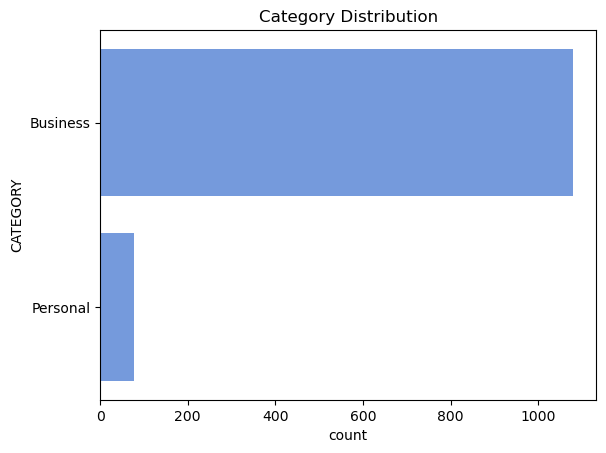

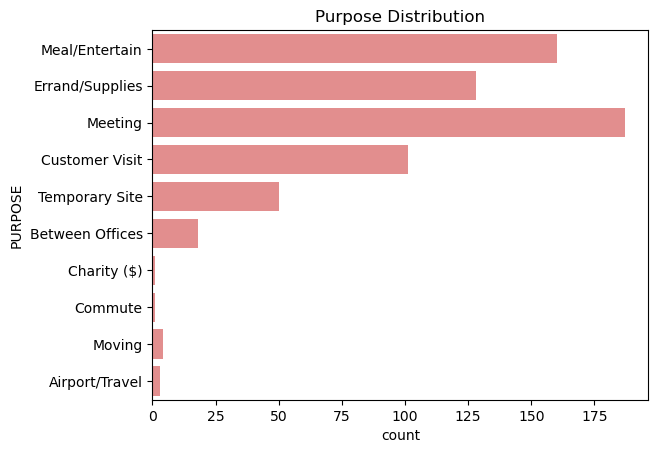

In [4]:
## Data distipution For Original DataSet

import matplotlib.pyplot as plt
import seaborn as sns

# Select the specified categorical columns 'CATEGORY' and 'PURPOSE' from the DataFrame
obj_columns = data.loc[:, ["CATEGORY", "PURPOSE"]]

# Dictionary to map each column to a title and color
plot_details = {
    "CATEGORY": {"title": "Category Distribution", "color": "cornflowerblue"},
    "PURPOSE": {"title": "Purpose Distribution", "color": "lightcoral"}
}

# Loop through each column in the selected object columns
for c in obj_columns:
    plt.figure()  # Create a new figure for each column plot
    
    # Plot the count of each unique value in the column 'c' using a horizontal bar chart with a specific color
    sns.countplot(y=c, data=data, color=plot_details[c]["color"])
    
    # Set the title for each plot
    plt.title(plot_details[c]["title"])
    
    # Display the plot
    plt.show()


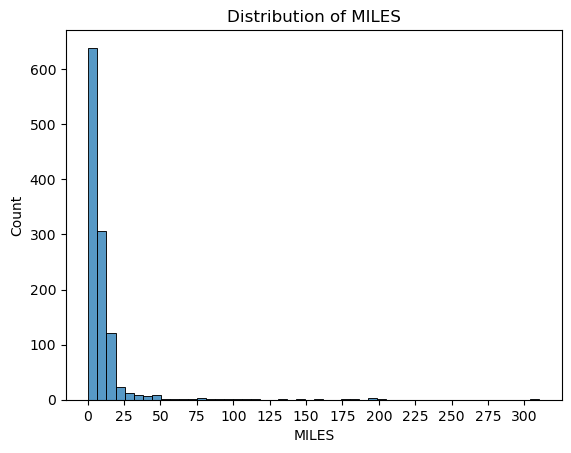

In [5]:
# Vis for Numerical data
num_columns = data.select_dtypes(exclude='object').columns
for c in num_columns:
    plt.figure()
    sns.histplot(x=c, bins=50, data=data)
    if c == "MILES":
        plt.xticks(ticks=range(0, 320, 25))
        plt.title('Distribution of MILES')
    plt.show()

## Correlation Analysis

Since the original dataset contains only one numeric feature, performing a meaningful correlation analysis is not possible. To address this, we will encode the categorical features, enabling their inclusion in the correlation analysis. Additionally, we will create and add new features to enrich the dataset. A detailed correlation analysis will be provided after encoding and feature enhancement.

C:\Users\alijb\AppData\Local\Temp\ipykernel_968\3327591842.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='MILES', data=data, palette='light:#5A9_r')


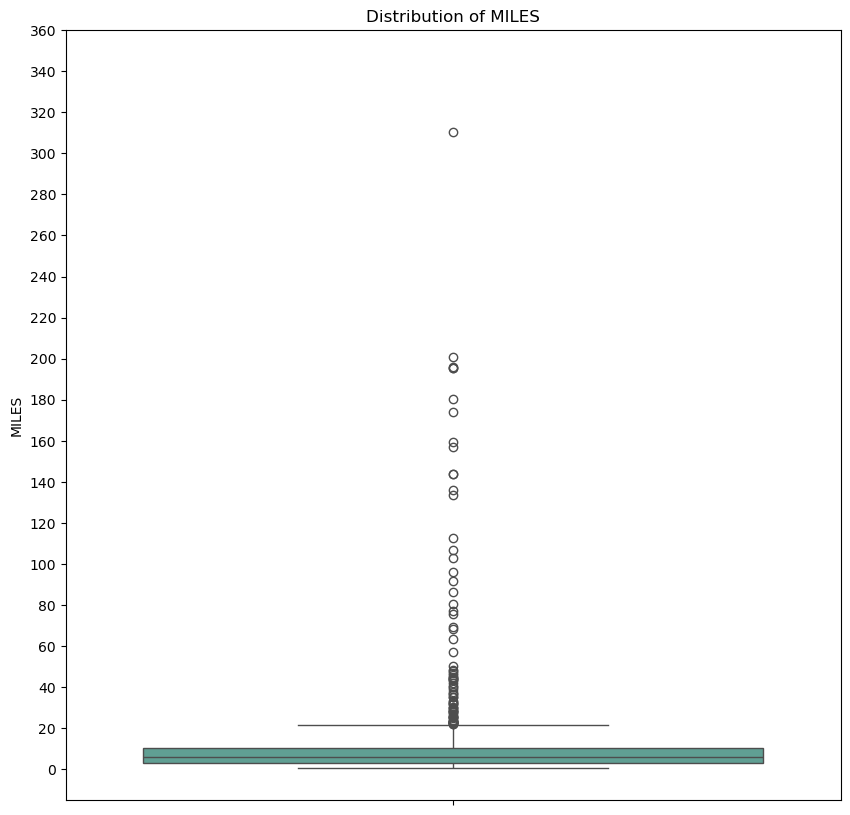

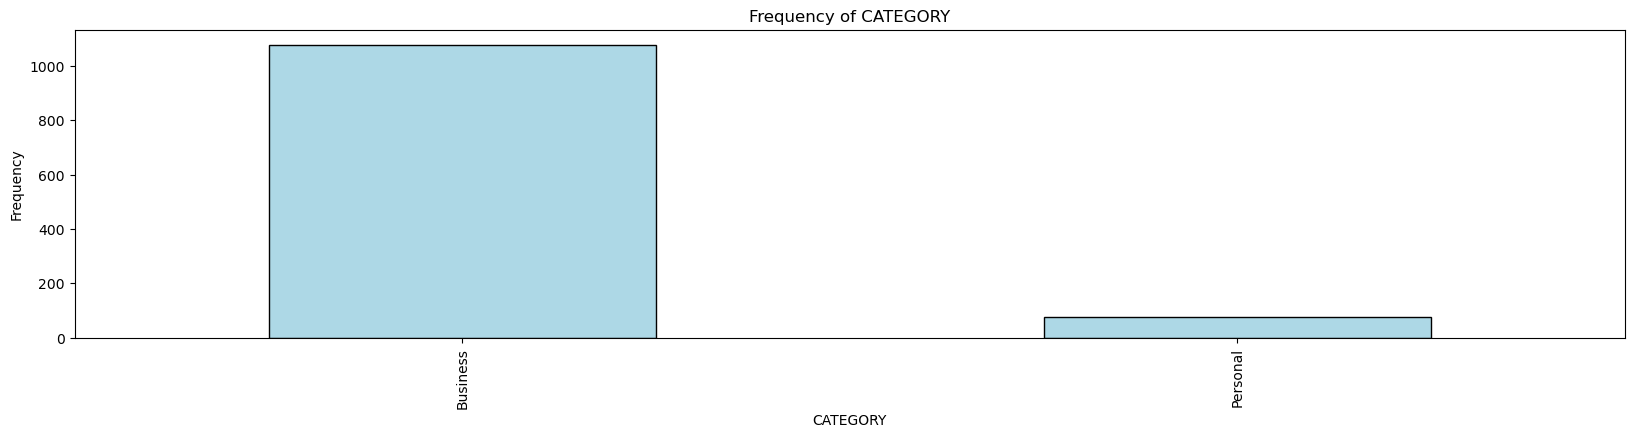

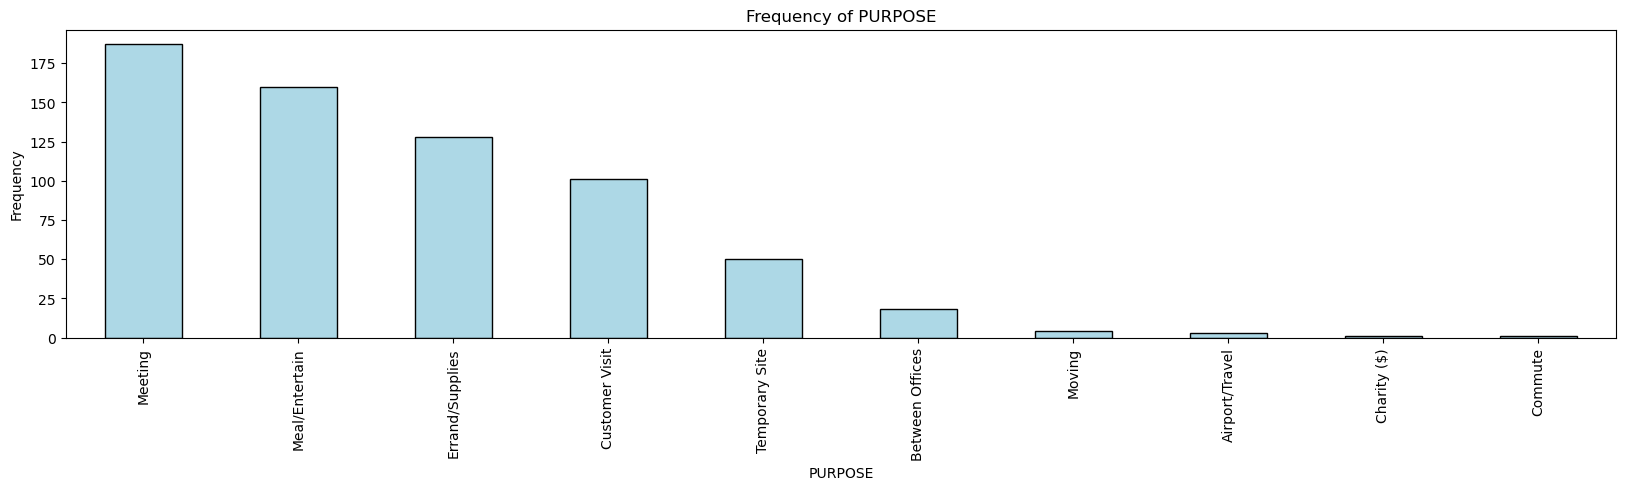

Discussion:

Numeric Outliers:
- Extreme values in 'MILES' (e.g., very high mileage) may represent data entry errors, anomalies, or unusual trips.
- These outliers could skew summary statistics like mean and standard deviation, impacting data analysis.

Categorical Outliers:
- Rare categories in 'START', 'STOP', and 'PURPOSE' may indicate unique or unusual trips. 
- While some outliers could provide valuable insights, others might represent data errors or noise.



In [6]:
# Outlier Detection

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('UberDataset.csv')
data = data.loc[0:1154, :]

# 1. Outlier Detection Using Statistical Methods for Numeric Data ('MILES')
Q1 = data['MILES'].quantile(0.25)
Q3 = data['MILES'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numeric_outliers = data[(data['MILES'] < lower_bound) | (data['MILES'] > upper_bound)]

# 2. Categorical Outliers Detection
categorical_outliers = {}
for col in ['CATEGORY', 'START', 'STOP', 'PURPOSE']:
    value_counts = data[col].value_counts()
    rare_categories = value_counts[value_counts < 2].index.tolist()  # Categories with frequency < 2
    categorical_outliers[col] = rare_categories

# 3. Visual Inspection
# Plot Numerical Features (MILES) using BoxPlots
plt.figure(figsize=(10, 10))
sns.boxplot(y='MILES', data=data, palette='light:#5A9_r')
plt.yticks(ticks=range(0, 380, 20))
plt.title('Distribution of MILES')
plt.ylabel('MILES')
plt.show()

# Display bar chart for each categorical column
for col in ['CATEGORY', 'PURPOSE']:
    plt.figure(figsize=(20, 4))
    data[col].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

print("Discussion:")
print("""
Numeric Outliers:
- Extreme values in 'MILES' (e.g., very high mileage) may represent data entry errors, anomalies, or unusual trips.
- These outliers could skew summary statistics like mean and standard deviation, impacting data analysis.

Categorical Outliers:
- Rare categories in 'START', 'STOP', and 'PURPOSE' may indicate unique or unusual trips. 
- While some outliers could provide valuable insights, others might represent data errors or noise.
""")



## Extra Fetures added to the DataSet

In [7]:
## Create New Column ((The Duration))

# Define custom date parsing function
def parse_dates(date_str):
    for fmt in ("%m-%d-%Y %H:%M", "%m/%d/%Y %H:%M"):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    # Return NaT if all formats fail
    return pd.NaT

# Apply custom date parser to both START_DATE and END_DATE columns
data['START_DATE'] = data['START_DATE'].apply(parse_dates)
data['END_DATE'] = data['END_DATE'].apply(parse_dates)

# Check if any dates couldn't be parsed
unparsed_start_dates = data[data['START_DATE'].isna()]
unparsed_end_dates = data[data['END_DATE'].isna()]

# Calculate the duration in minutes and create a new column
data['DURATION'] = (data['END_DATE'] - data['START_DATE']).dt.total_seconds() / 60

# Reorder columns to place DURATION after END_DATE
data.insert(data.columns.get_loc('END_DATE') + 1, 'DURATION', data.pop('DURATION'))




In [8]:
## Create New Column ((LOCAL_TRIP)) that will check if the destination is the same of the starting point

data['DESTINATION'] = data.apply(lambda row: 'Not Provided' if row["START"] == 'Unknown Location' or row["STOP"] == 'Unknown Location' 
                                else ('In City' if row["START"] == row["STOP"] else 'Out of City'), axis=1)
# Rearrange the colunms
cols = ['START_DATE', 'END_DATE', 'DURATION', 'CATEGORY', 'START', 'STOP', 'DESTINATION', 'MILES', 'PURPOSE']
data = data[cols]
#display(data.head())

In [9]:
# Export to a new CSV file
data.to_csv('UberDataset_with_NewFeatures.csv', index=False)

print("New CSV file created successfully.")

New CSV file created successfully.


In [10]:
## add start Time with interval by 15 min
import pandas as pd
import datetime as dt

# Load your dataset
df2 = pd.read_csv("UberDataset_with_NewFeatures.csv")

# Convert START_DATE to datetime format
df2['START_DATE'] = pd.to_datetime(df2['START_DATE'], errors='coerce')

# Function to categorize time intervals
def get_start_hour(time):
    if pd.isna(time):  # Check for NaT
        return "Not Provided"
    
    hour = time.hour
    minute = time.minute
    
    if 0 <= minute <= 7:
        minute_interval = "00"
    elif 8 <= minute <= 22:
        minute_interval = "15"
    elif 23 <= minute <= 37:
        minute_interval = "30"
    elif 38 <= minute <= 52:
        minute_interval = "45"
    else:
        hour = (hour + 1) % 24  # Increment hour and handle overflow at 23
        minute_interval = "00"
    
    # Format time as "HH:MM AM/PM" and remove leading zero if any
    start_hour = dt.time(hour, int(minute_interval)).strftime("%I:%M %p").lstrip("0")
    return start_hour

# Apply function to create the new column
df2['START_HOUR'] = df2['START_DATE'].apply(lambda x: get_start_hour(x.time()) if pd.notna(x) else "Not Provided")

# Move 'Start_Hour' column to the first position
cols = ['START_HOUR'] + [col for col in df2.columns if col != 'START_HOUR']
df2 = df2[cols]

# Save the updated dataset
df2.to_csv("UberDataset_with_NewFeatures.csv", index=False)
display(df2.head())



,START_HOUR,START_DATE,END_DATE,DURATION,CATEGORY,START,STOP,DESTINATION,MILES,PURPOSE
0,9:15 PM,2016-01-01 21:11:00,2016-01-01 21:17:00,6.0,Business,Fort Pierce,Fort Pierce,In City,5.1,Meal/Entertain
1,1:30 AM,2016-01-02 01:25:00,2016-01-02 01:37:00,12.0,Business,Fort Pierce,Fort Pierce,In City,5.0,NaN
2,8:30 PM,2016-01-02 20:25:00,2016-01-02 20:38:00,13.0,Business,Fort Pierce,Fort Pierce,In City,4.8,Errand/Supplies
3,5:30 PM,2016-01-05 17:31:00,2016-01-05 17:45:00,14.0,Business,Fort Pierce,Fort Pierce,In City,4.7,Meeting
4,2:45 PM,2016-01-06 14:42:00,2016-01-06 15:49:00,67.0,Business,Fort Pierce,West Palm Beach,Out of City,63.7,Customer Visit


# Part 2: Data Preprocessing

In [11]:
## fill the Null Purpose with Not Provided

# Fill null values in the PURPOSE column with "Not Provided"
df2['PURPOSE'] = df2['PURPOSE'].fillna("Not Provided")

# Save the updated dataset
df2.to_csv("UberDataset_with_NewFeatures.csv", index=False)
#--------------------------------------------------------------#
# will be used for the visualization
df3 = pd.read_csv("UberDataset_with_NewFeatures.csv")

#--------------------------------------------------------------#
# # correct cities with (?) such as (k?rachi to karachi)
import pandas as pd
from rapidfuzz import process, fuzz
from tqdm import tqdm


# Load world cities dataset with correct city names
world_cities = pd.read_csv("worldcities.csv")

# Preprocess world cities for efficient matching (removing non-alphanumeric characters and converting to lowercase)
world_cities['cleaned_city'] = world_cities['city_ascii'].apply(lambda x: ''.join(e for e in str(x) if e.isalnum()).lower())

# Function to correct city names with '?' using Levenshtein distance (fuzzy matching)
def correct_city_name(name, world_cities, max_changes=2):
    if isinstance(name, str) and '?' in name:  # Only check if '?' is in the name
        cleaned_name = ''.join(e for e in name if e.isalnum()).lower()  # Clean the city name
        if cleaned_name and cleaned_name != 'Unknown Location':  # Ignore 'Unknown Location'
            # Fuzzy match with a score threshold and maximum Levenshtein distance (max_changes)
            match = process.extractOne(cleaned_name, world_cities['cleaned_city'], scorer=fuzz.ratio)
            if match and match[1] >= 80:  # You can adjust the score threshold for accuracy
                # If Levenshtein distance is small (up to max_changes), consider it a match
                if fuzz.ratio(cleaned_name, match[0]) >= (100 - (max_changes * 10)):  # Example: 1 change -> 90%, 2 changes -> 80%
                    matched_city = world_cities.loc[world_cities['cleaned_city'] == match[0], 'city_ascii'].iloc[0]
                    return matched_city
    return name  # Return original name if no match found or '?' is not in the name

# Apply the correction function with progress tracking
tqdm.pandas()
df2['START'] = df2['START'].progress_apply(lambda x: correct_city_name(x, world_cities))
df2['STOP'] = df2['STOP'].progress_apply(lambda x: correct_city_name(x, world_cities))

# Save the corrected data to a new CSV file
df2.to_csv("UberDataset_with_NewFeatures.csv", index=False)

print("City names with '?' corrected successfully!")


100%|█████████████████████████████████████████████████████████████████████████████| 1155/1155 [00:01<00:00, 708.88it/s]

City names with '?' corrected successfully!


In [12]:
display(df2.head())
print("PURPOSE has:")
display(df2["PURPOSE"].unique())
print("*" * 100)
print("CATEGORY has:")
display(df2["CATEGORY"].unique())

,START_HOUR,START_DATE,END_DATE,DURATION,CATEGORY,START,STOP,DESTINATION,MILES,PURPOSE
0,9:15 PM,2016-01-01 21:11:00,2016-01-01 21:17:00,6.0,Business,Fort Pierce,Fort Pierce,In City,5.1,Meal/Entertain
1,1:30 AM,2016-01-02 01:25:00,2016-01-02 01:37:00,12.0,Business,Fort Pierce,Fort Pierce,In City,5.0,Not Provided
2,8:30 PM,2016-01-02 20:25:00,2016-01-02 20:38:00,13.0,Business,Fort Pierce,Fort Pierce,In City,4.8,Errand/Supplies
3,5:30 PM,2016-01-05 17:31:00,2016-01-05 17:45:00,14.0,Business,Fort Pierce,Fort Pierce,In City,4.7,Meeting
4,2:45 PM,2016-01-06 14:42:00,2016-01-06 15:49:00,67.0,Business,Fort Pierce,West Palm Beach,Out of City,63.7,Customer Visit


PURPOSE has:


array(['Meal/Entertain', 'Not Provided', 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

****************************************************************************************************
CATEGORY has:


array(['Business', 'Personal'], dtype=object)

In [13]:
## Encoded

# Map the CATEGORY column to numerical labels
category_mapping = {'Business': 1, 'Personal': 2}
df2['CATEGORY'] = df2['CATEGORY'].replace(category_mapping)


purpose_mapping = {'Not Provided': 0, 'Meal/Entertain': 1, 'Errand/Supplies': 2, 'Meeting': 3,
                   'Customer Visit': 4,'Temporary Site':5,'Between Offices': 6, 'Charity ($)': 7,
                   'Commute': 8, 'Moving': 9, 'Airport/Travel': 10}

df2['PURPOSE'] = df2['PURPOSE'].replace(purpose_mapping)


# Map the DESTINATION column to numerical labels
destination_mapping = {'Not Provided': 0, 'In City': 1, 'Out of City': 2}
df2['DESTINATION'] = df2['DESTINATION'].replace(destination_mapping)

C:\Users\alijb\AppData\Local\Temp\ipykernel_968\1402919966.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['CATEGORY'] = df2['CATEGORY'].replace(category_mapping)
C:\Users\alijb\AppData\Local\Temp\ipykernel_968\1402919966.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['PURPOSE'] = df2['PURPOSE'].replace(purpose_mapping)
C:\Users\alijb\AppData\Local\Temp\ipykernel_968\1402919966.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior

In [14]:

# Deleting raws that are not provided in DESTINATION

df2 = df2[df2['DESTINATION'] != 0]
display(df2.head())
display(df2.info())

,START_HOUR,START_DATE,END_DATE,DURATION,CATEGORY,START,STOP,DESTINATION,MILES,PURPOSE
0,9:15 PM,2016-01-01 21:11:00,2016-01-01 21:17:00,6.0,1,Fort Pierce,Fort Pierce,1,5.1,1
1,1:30 AM,2016-01-02 01:25:00,2016-01-02 01:37:00,12.0,1,Fort Pierce,Fort Pierce,1,5.0,0
2,8:30 PM,2016-01-02 20:25:00,2016-01-02 20:38:00,13.0,1,Fort Pierce,Fort Pierce,1,4.8,2
3,5:30 PM,2016-01-05 17:31:00,2016-01-05 17:45:00,14.0,1,Fort Pierce,Fort Pierce,1,4.7,3
4,2:45 PM,2016-01-06 14:42:00,2016-01-06 15:49:00,67.0,1,Fort Pierce,West Palm Beach,2,63.7,4


<class 'pandas.core.frame.DataFrame'>
Index: 944 entries, 0 to 1154
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_HOUR   944 non-null    object        
 1   START_DATE   944 non-null    datetime64[ns]
 2   END_DATE     944 non-null    object        
 3   DURATION     944 non-null    float64       
 4   CATEGORY     944 non-null    int64         
 5   START        944 non-null    object        
 6   STOP         944 non-null    object        
 7   DESTINATION  944 non-null    int64         
 8   MILES        944 non-null    float64       
 9   PURPOSE      944 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 81.1+ KB


None

### Note 
The following two section for removing outliers and scaling numeric data

### Correlation Analysis after Encoding

In [15]:
corr = df2.loc[:, ['DURATION', "CATEGORY", "MILES", "PURPOSE", 'DESTINATION']].corr()

# Display the correlation matrix with a gradient and set precision
display(corr.style.background_gradient(cmap='coolwarm').format(precision=4))


,DURATION,CATEGORY,MILES,PURPOSE,DESTINATION
DURATION,1.0000,-0.0145,0.9160,0.1868,0.1148
CATEGORY,-0.0145,1.0000,-0.0097,-0.1560,-0.0520
MILES,0.9160,-0.0097,1.0000,0.1704,0.1362
PURPOSE,0.1868,-0.1560,0.1704,1.0000,0.1061
DESTINATION,0.1148,-0.0520,0.1362,0.1061,1.0000


# Part 3: Modeling

## Model Training

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

# Choose the target
target = 'CATEGORY'

# Deleting the unwanted features and the target
X = df2.drop(['START_HOUR', 'START_DATE', 'END_DATE', 'START', 'STOP', 'PURPOSE',  target],axis=1)
display(X.head())
display(X.info())


y = df2[target].values 

# Split the data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Apply the model
dtClf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best')
dtClf = dtClf.fit(X_train,y_train)
dt_y_pred = dtClf.predict(X_test)



,DURATION,DESTINATION,MILES
0,6.0,1,5.1
1,12.0,1,5.0
2,13.0,1,4.8
3,14.0,1,4.7
4,67.0,2,63.7


<class 'pandas.core.frame.DataFrame'>
Index: 944 entries, 0 to 1154
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DURATION     944 non-null    float64
 1   DESTINATION  944 non-null    int64  
 2   MILES        944 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 29.5 KB


None

## Model Evaluation

1. Accuracy
Definition: The ratio of correctly predicted instances to the total instances.
When to Use: Use accuracy when you have a balanced dataset and when both types of errors (false positives and false negatives) are equally important.


2. Precision and Recall
Precision: The ratio of true positives to the total predicted positives.
Recall: The ratio of true positives to the actual positives.
When to Use: Precision and recall are valuable if the dataset is imbalanced or if you care more about identifying certain classes correctly.


3. F1 Score
Definition: The harmonic mean of precision and recall, balancing both metrics.
When to Use: F1 is suitable if you want a balance between precision and recall, especially useful when there’s an imbalance in classes and when misclassifying either class is costly.

In [17]:
print("Decision Tree: \n")
print("Accuracy:=",  accuracy_score(y_test, dt_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, dt_y_pred))


precision = precision_score(y_test, dt_y_pred)
recall = recall_score(y_test, dt_y_pred)
f1 = f1_score(y_test, dt_y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1) # Best for imbalanced dataset

Decision Tree: 

Accuracy:= 0.8697183098591549
Confusion Matrix:= 
 [[245  18]
 [ 19   2]]
Precision: 0.928030303030303
Recall: 0.9315589353612167
F1 Score: 0.9297912713472486


In [18]:
# Try another algorithm to improve the model. 
# Try RandomForest

from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("RandomForest:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



RandomForest:
Accuracy: 0.9014084507042254
Precision: 0.9272727272727272
Recall: 0.9695817490494296
F1 Score: 0.9479553903345725


## Model Improvement

We used the RandomForest algorithm 

In [19]:
# Try another algorithm to improve the model. 
# Try RandomForest

from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("RandomForest:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



RandomForest:
Accuracy: 0.9014084507042254
Precision: 0.9272727272727272
Recall: 0.9695817490494296
F1 Score: 0.9479553903345725


### Adjusting hyperparameters

Adjusting hyperparameters, also known as hyperparameter tuning, involves finding the best settings for parameters that control the model's structure and training process. For example:

In Decision Trees: Common hyperparameters include max_depth (limits the depth of the tree), min_samples_split (the minimum samples needed to split an internal node), and min_samples_leaf (the minimum samples required at a leaf node).


In Random Forests: Hyperparameters include n_estimators (the number of trees in the forest), max_depth, and max_features (the number of features to consider at each split).


Optimizing these can lead to a more accurate and generalizable model. GridSearchCV from scikit-learn can automate this process by testing multiple combinations of hyperparameters and selecting the best-performing set.

In [20]:
# Apply Adjusting hyperparameters to improve the module

from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#--------------------I will leave it here in case if it is needed-------------------
# Decision Tree
# Hyperparameter grids for Decision Tree
decision_tree_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtClf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best')
dt_grid_search = GridSearchCV(estimator=dtClf, param_grid=decision_tree_params, scoring='f1', cv=5)
dt_grid_search.fit(X, y)
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)
print("Best Decision Tree F1 Score:", dt_grid_search.best_score_)
# Save parameters
decisionTreeParameters = dt_grid_search.best_params_
#--------------------------------------------------------------------------------------

# RandomForest 
# Hyperparameter grids for RandomForest
random_forest_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=random_forest_params, scoring='f1', cv=5)
rf_grid_search.fit(X, y)

# Best parameters and performance for Random Forest
print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Best Random Forest F1 Score:", rf_grid_search.best_score_)

# Save parameters
randomForestParameters = rf_grid_search.best_params_

Best Decision Tree Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Decision Tree F1 Score: 0.9586256775095467
Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Random Forest F1 Score: 0.9603120878114583


In [21]:
# Apply Adjusting hyperparameters on both models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Apply Adjusting hyperparameters on Decision Tree 
from sklearn.tree import DecisionTreeClassifier

best_dt_clf = DecisionTreeClassifier(
    max_depth= decisionTreeParameters['max_depth'],
    min_samples_leaf=decisionTreeParameters['min_samples_leaf'],
    min_samples_split=decisionTreeParameters['min_samples_split'],
    random_state=42
)

# Train the model
best_dt_clf.fit(X_train, y_train)
DecisionTree = best_dt_clf
# Make predictions
y_pred = best_dt_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Apply Adjusting hyperparameters on RandomForest
# Initialize Random Forest Classifier with the best parameters
best_rf_clf = RandomForestClassifier(
    max_depth=randomForestParameters['max_depth'],
    min_samples_leaf=randomForestParameters['min_samples_leaf'],
    min_samples_split=randomForestParameters['min_samples_split'],
    n_estimators=randomForestParameters['n_estimators'],
    random_state=42
)

# Train the model
best_rf_clf.fit(X_train, y_train)
RandomForest = best_rf_clf
# Make predictions
y_pred = best_rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Random Forest:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Random Forest:
Accuracy: 0.926056338028169
Precision: 0.926056338028169
Recall: 1.0
F1 Score: 0.9616087751371115


In [22]:
## Validation

In [23]:
# Apply K-Fold Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
scoring_metrics = {
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}
print("Decision Tree: ")
for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(DecisionTree, X, y, cv=5, scoring=scorer)
    print(f"Cross-Validation {metric_name.capitalize()} Scores:", scores.round(3))
    print(f"Average {metric_name.capitalize()} Score:", scores.mean().round(3))
    
print("\nRandomForest: ")
for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(RandomForest, X, y, cv=5, scoring=scorer)
    print(f"Cross-Validation {metric_name.capitalize()} Scores:", scores.round(3))
    print(f"Average {metric_name.capitalize()} Score:", scores.mean().round(3))
    



Decision Tree: 
Cross-Validation F1 Scores: [0.956 0.953 0.959 0.959 0.961]
Average F1 Score: 0.957
Cross-Validation Precision Scores: [0.925 0.92  0.921 0.921 0.926]
Average Precision Score: 0.922
Cross-Validation Recall Scores: [0.989 0.989 1.    1.    1.   ]
Average Recall Score: 0.995

RandomForest: 
Cross-Validation F1 Scores: [0.962 0.959 0.959 0.959 0.964]
Average F1 Score: 0.96
Cross-Validation Precision Scores: [0.926 0.921 0.921 0.921 0.93 ]
Average Precision Score: 0.924
Cross-Validation Recall Scores: [1. 1. 1. 1. 1.]
Average Recall Score: 1.0


# Part 4: Visualization

In [24]:
display(df3.head())

,START_HOUR,START_DATE,END_DATE,DURATION,CATEGORY,START,STOP,DESTINATION,MILES,PURPOSE
0,9:15 PM,2016-01-01 21:11:00,2016-01-01 21:17:00,6.0,Business,Fort Pierce,Fort Pierce,In City,5.1,Meal/Entertain
1,1:30 AM,2016-01-02 01:25:00,2016-01-02 01:37:00,12.0,Business,Fort Pierce,Fort Pierce,In City,5.0,Not Provided
2,8:30 PM,2016-01-02 20:25:00,2016-01-02 20:38:00,13.0,Business,Fort Pierce,Fort Pierce,In City,4.8,Errand/Supplies
3,5:30 PM,2016-01-05 17:31:00,2016-01-05 17:45:00,14.0,Business,Fort Pierce,Fort Pierce,In City,4.7,Meeting
4,2:45 PM,2016-01-06 14:42:00,2016-01-06 15:49:00,67.0,Business,Fort Pierce,West Palm Beach,Out of City,63.7,Customer Visit


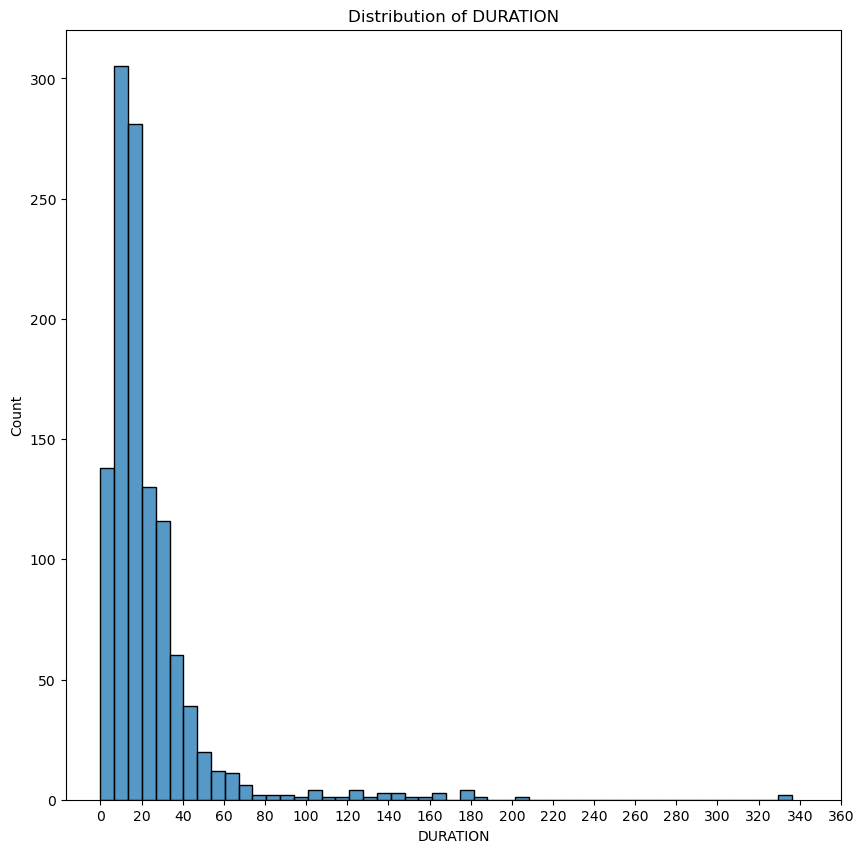

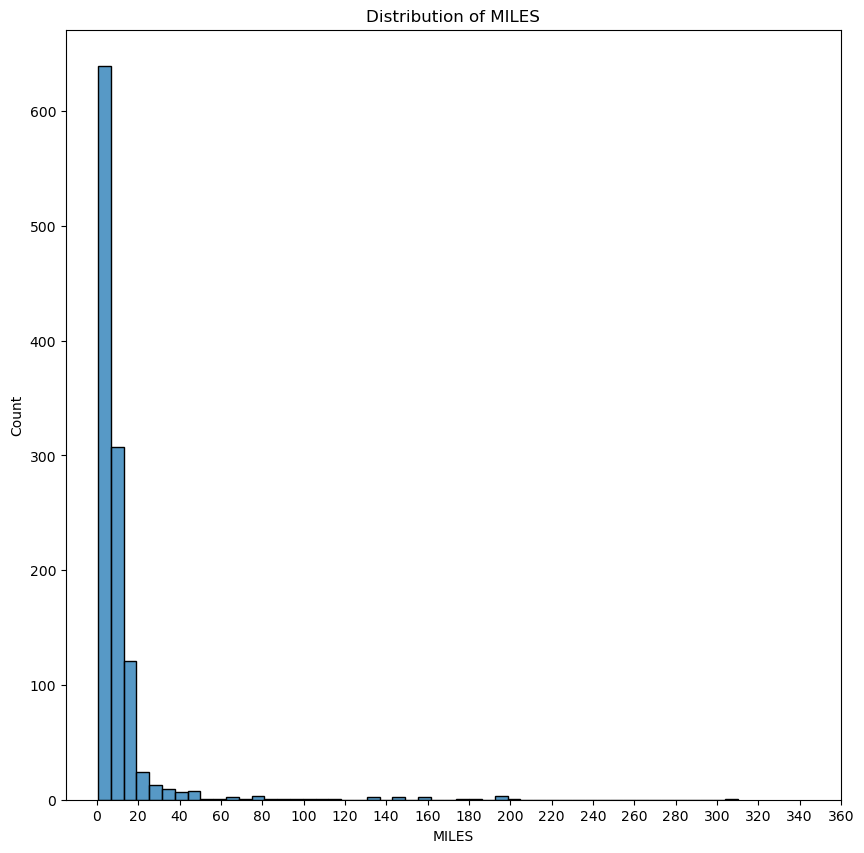

In [25]:
# Plot Numerical Features (Duration and Miles) using Histograms
num_columns = df3.select_dtypes(exclude='object').columns
for c in num_columns:
    plt.figure(figsize= (10, 10))
    sns.histplot(x=c, bins=50, data=df3)
    plt.title(f'Distribution of {c}')
    plt.xticks(ticks=range(0, 380, 20))
    plt.show()


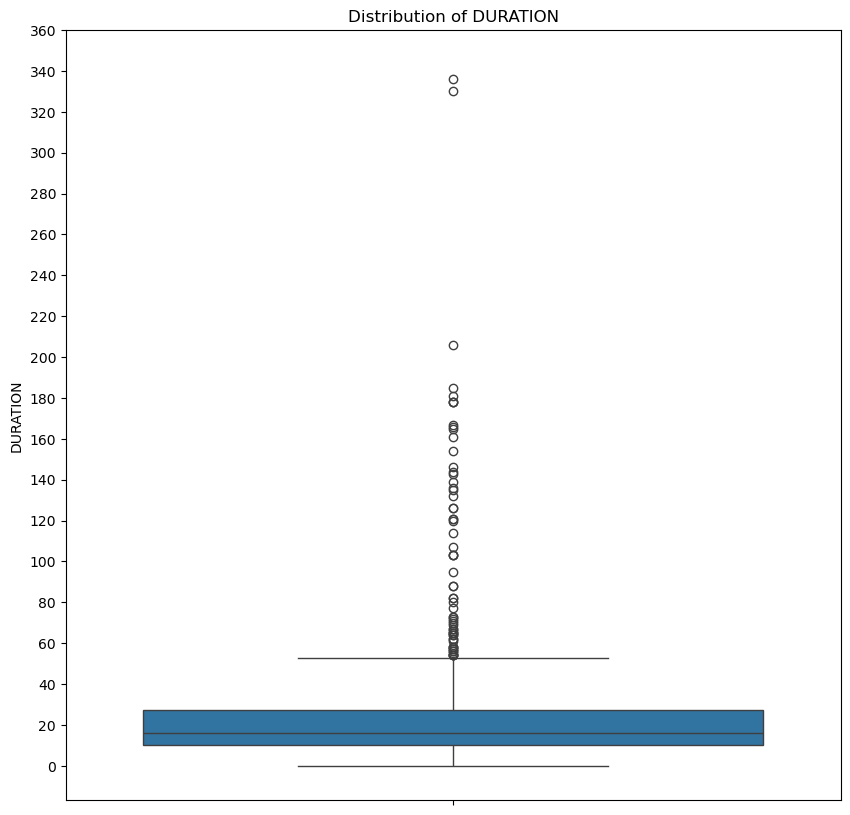

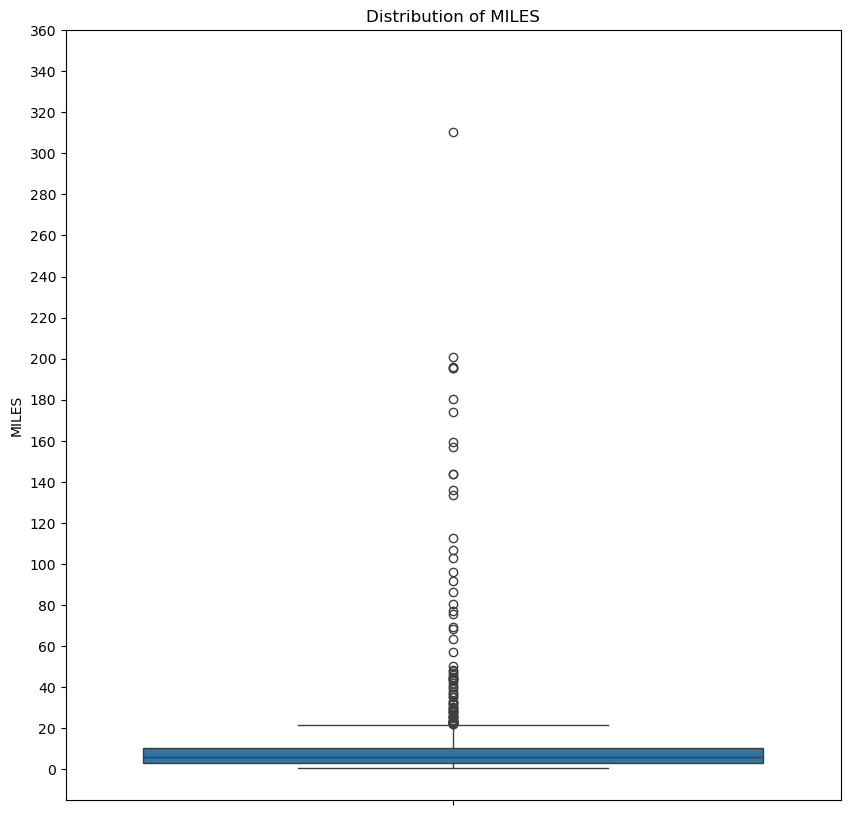

In [26]:
# Plot Numerical Features (Duration and Miles) using BoxPlots
num_columns = df3.select_dtypes(exclude='object').columns
 
for c in num_columns:
    plt.figure(figsize= (10, 10))
    sns.boxplot(y=c,data=df3);
    plt.yticks(ticks=range(0, 380, 20))
    plt.title(f'Distribution of {c}')
    plt.show()

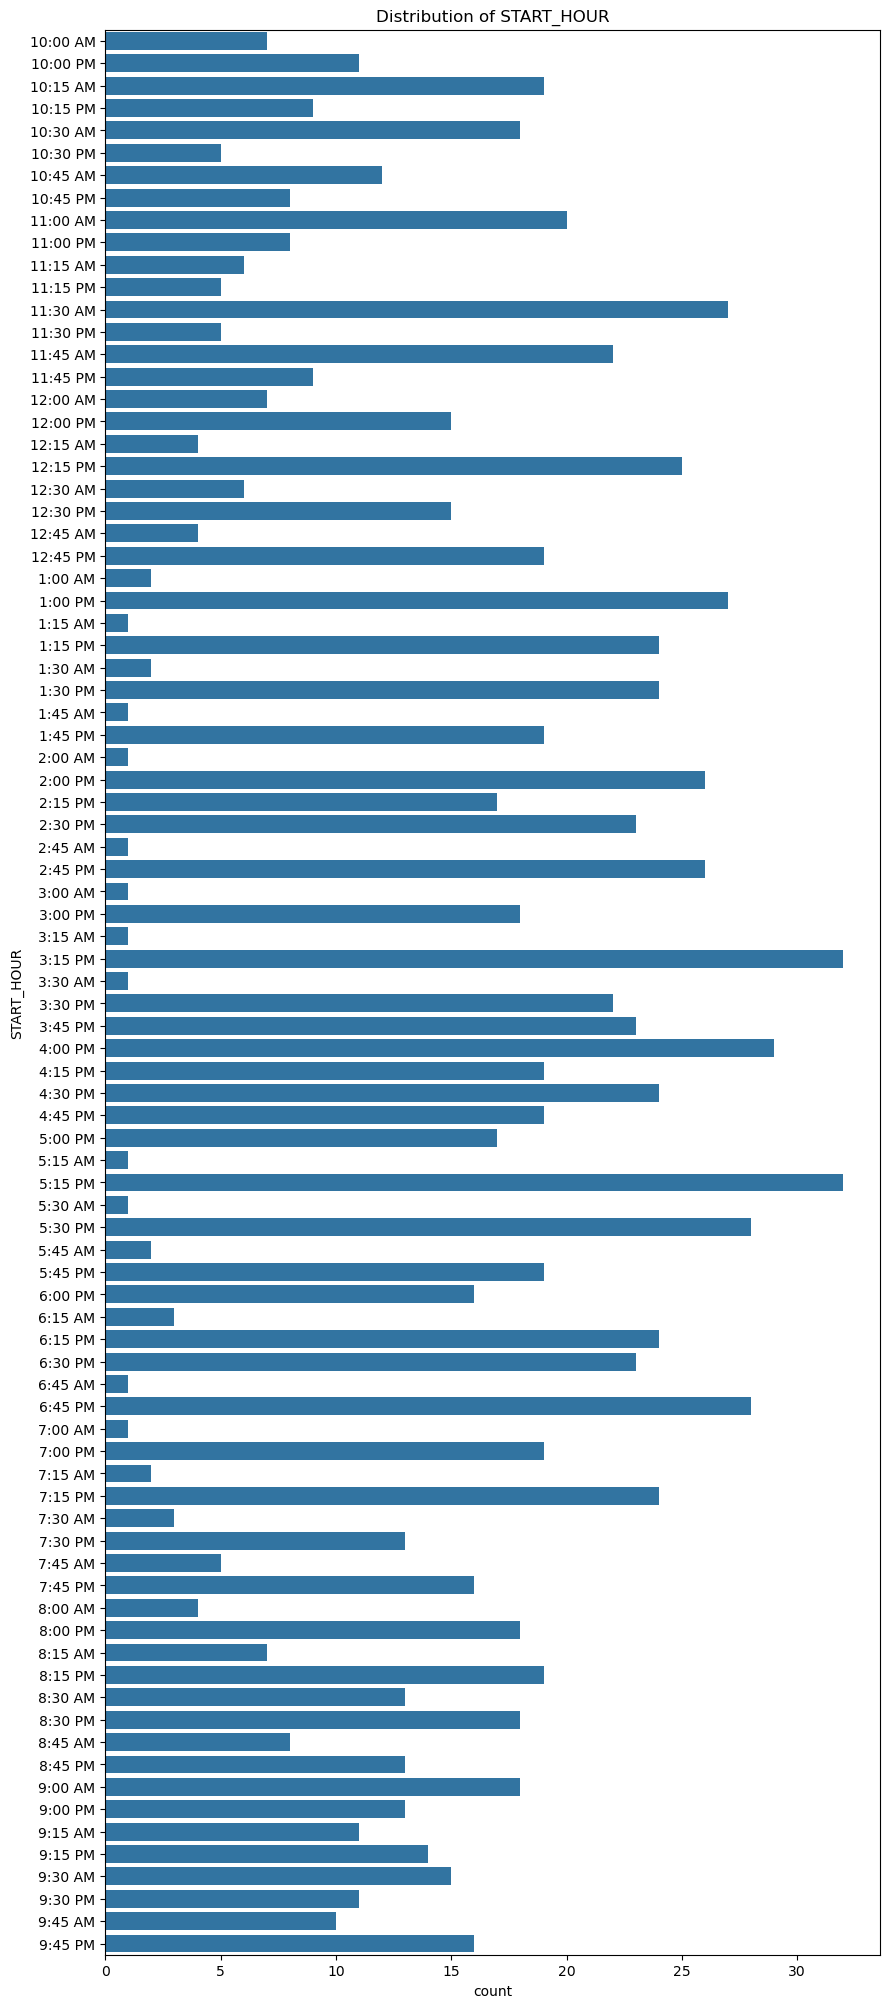

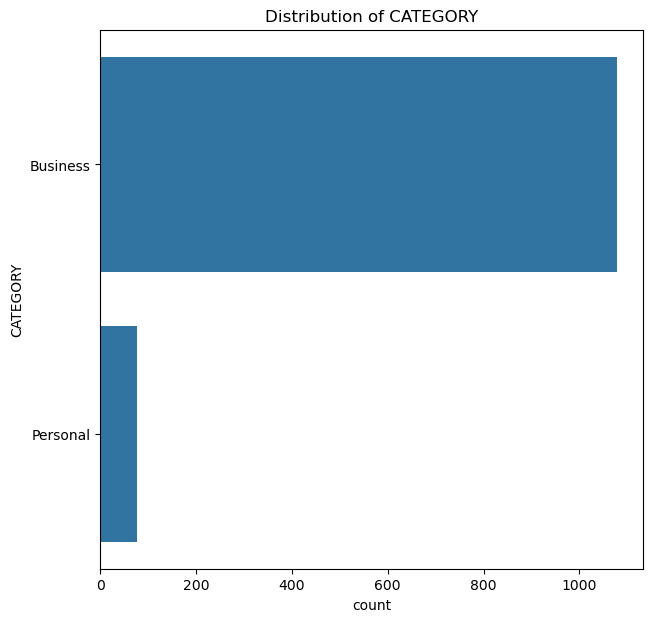

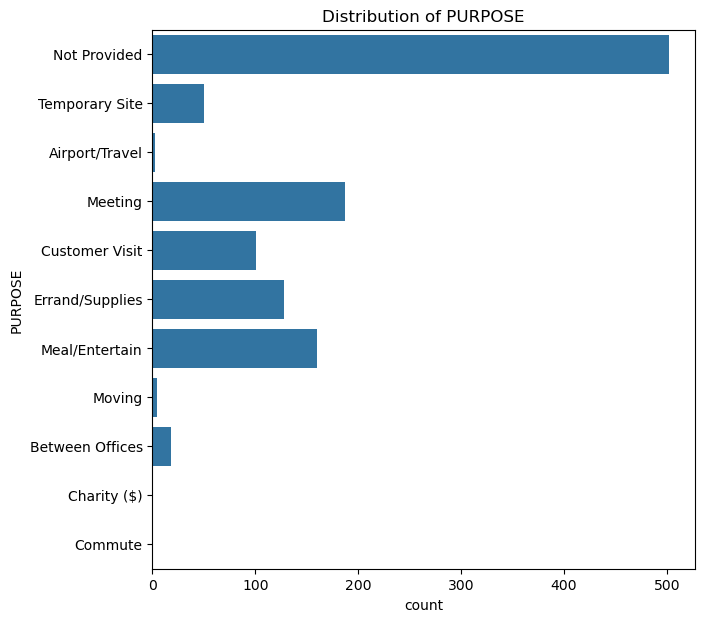

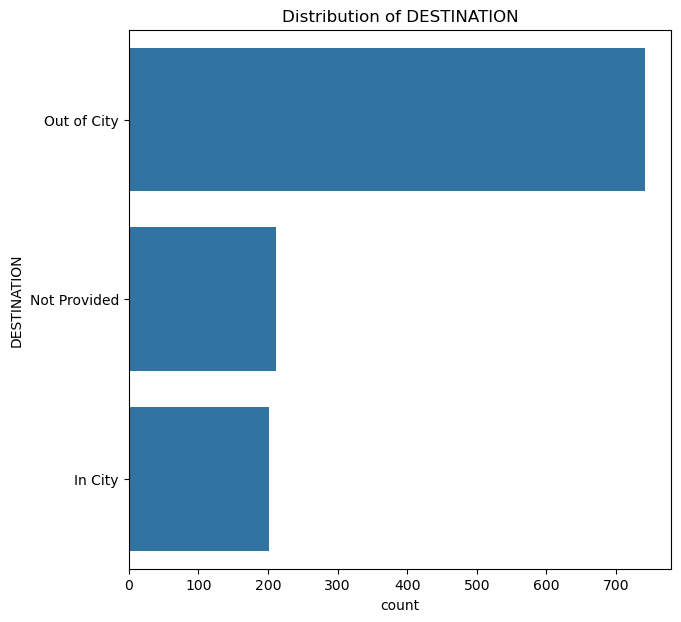

In [27]:
# Plot Categorical Features (START_HOUR, CATEGORY, PURPOSE, and DESTINATION) using count Plots
obj_columns = df3.loc[:, ['START_HOUR',"CATEGORY", "PURPOSE", "DESTINATION"]]
 
for c in obj_columns:
    if c == 'START_HOUR':
        plt.figure(figsize=(10,25))
    else:
        plt.figure(figsize=(7,7))
    sns.countplot(y=c,data=df3.sort_values('START_HOUR'));
    plt.title(f'Distribution of {c}')
    plt.show()

## Feature Importance

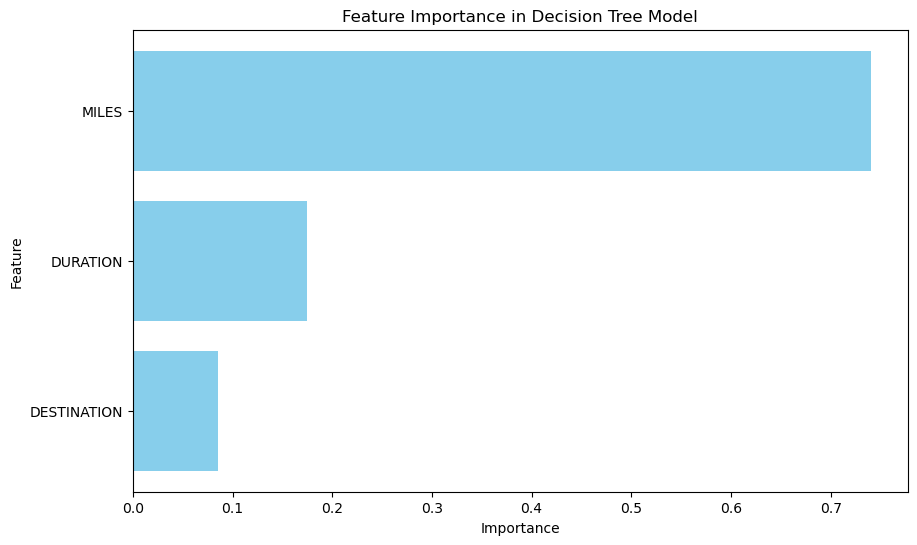

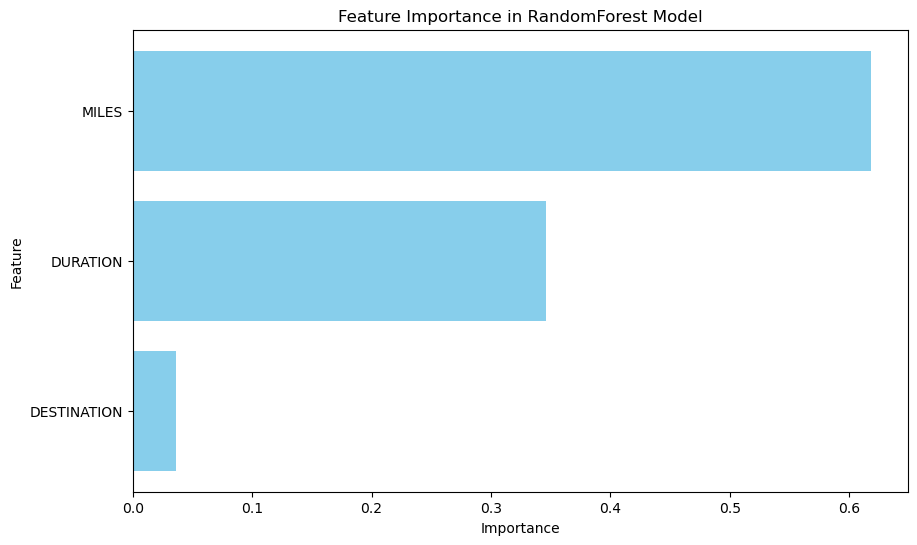

In [28]:
# Feature Importance for Decision Tree
best_dt_clf = DecisionTree
# Extract feature importance
feature_importance = best_dt_clf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Model')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


# Feature Importance for RandomForest
best_dt_clf = RandomForest  

# Extract feature importance
feature_importance = best_dt_clf.feature_importances_

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in RandomForest Model')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

## Model Performance Across Features

### Decision Tree

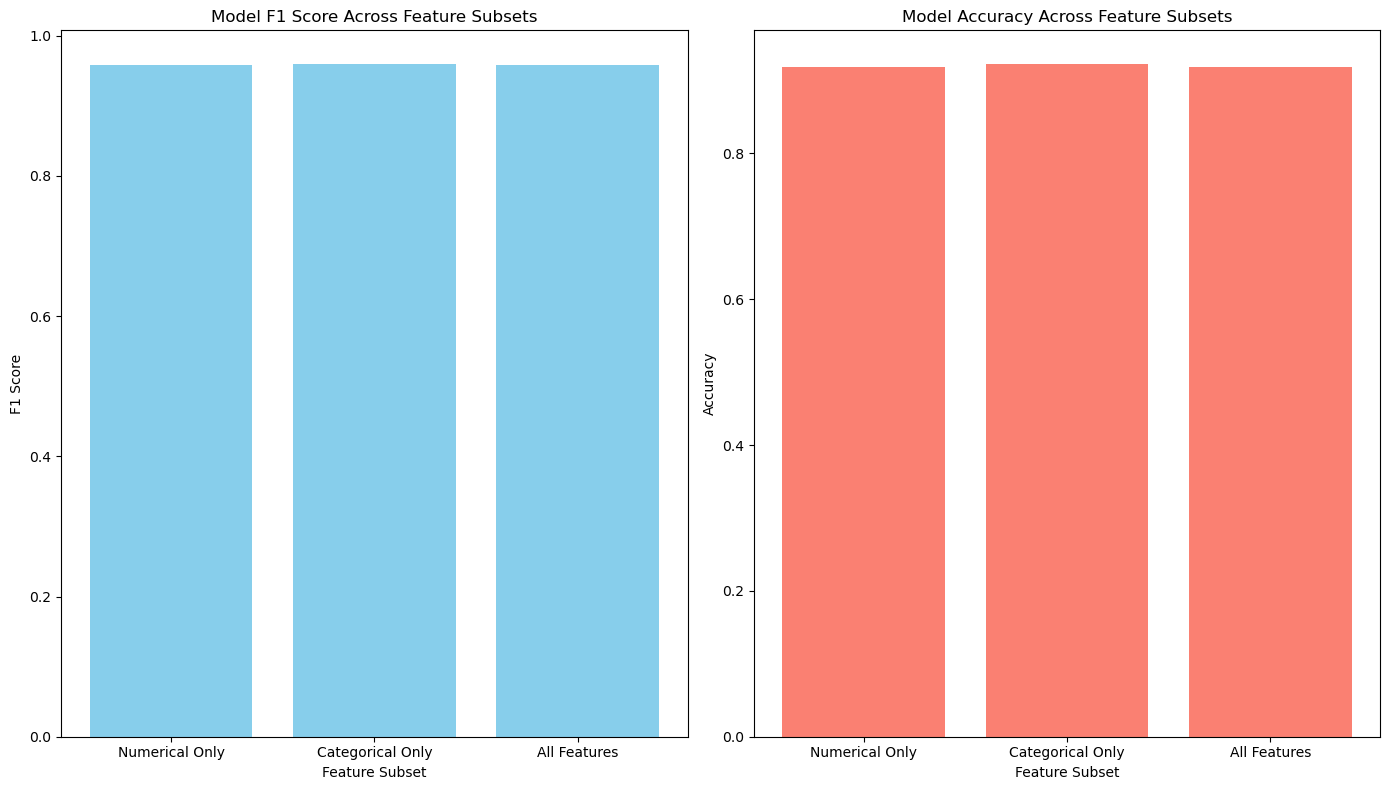

In [29]:
# Define feature subsets
feature_subsets = {
    'Numerical Only': X[['DURATION', 'MILES']],
    'Categorical Only': X.drop(columns=['DURATION', 'MILES']),
    'All Features': X
}

# Initialize model  
best_dt_clf = DecisionTreeClassifier(
max_depth= decisionTreeParameters['max_depth'],
min_samples_leaf=decisionTreeParameters['min_samples_leaf'],
min_samples_split=decisionTreeParameters['min_samples_split'],
random_state=42
)
# Initialize storage for performance metrics
performance_results = {'Feature Subset': [], 'F1 Score': [], 'Accuracy': []}
# Train and evaluate the model on each subset
for subset_name, subset_features in feature_subsets.items():
    X_train, X_test, y_train, y_test = train_test_split(subset_features, y, test_size=0.3, random_state=42)
    

    
    # Train the model on this subset
    best_dt_clf.fit(X_train, y_train)
    
    # Predict and calculate metrics
    y_pred = best_dt_clf.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    performance_results['Feature Subset'].append(subset_name)
    performance_results['F1 Score'].append(f1)
    performance_results['Accuracy'].append(accuracy)

# Convert to DataFrame for visualization
performance_df = pd.DataFrame(performance_results)

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(14, 8))

# F1 Score plot
ax[0].bar(performance_df['Feature Subset'], performance_df['F1 Score'], color='skyblue')
ax[0].set_title('Model F1 Score Across Feature Subsets')
ax[0].set_xlabel('Feature Subset')
ax[0].set_ylabel('F1 Score')

# Accuracy plot
ax[1].bar(performance_df['Feature Subset'], performance_df['Accuracy'], color='salmon')
ax[1].set_title('Model Accuracy Across Feature Subsets')
ax[1].set_xlabel('Feature Subset')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

